# Classificar Cão e Gato CIFAR-10

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
num_classes = 2

- 3: cat
- 5: dog

### Pegando apenas cachorro e gato

In [4]:
index_train = np.where((y_train == 3) | (y_train == 5))

In [5]:
x_train = x_train[index_train[0]]

In [6]:
y_train = y_train[index_train[0]]

In [7]:
index_test = np.where((y_test == 3) | (y_test == 5))

In [8]:
x_test = x_test[index_test[0]]

In [9]:
y_test = y_test[index_test[0]]

## Visualizando treino e teste

# Treino

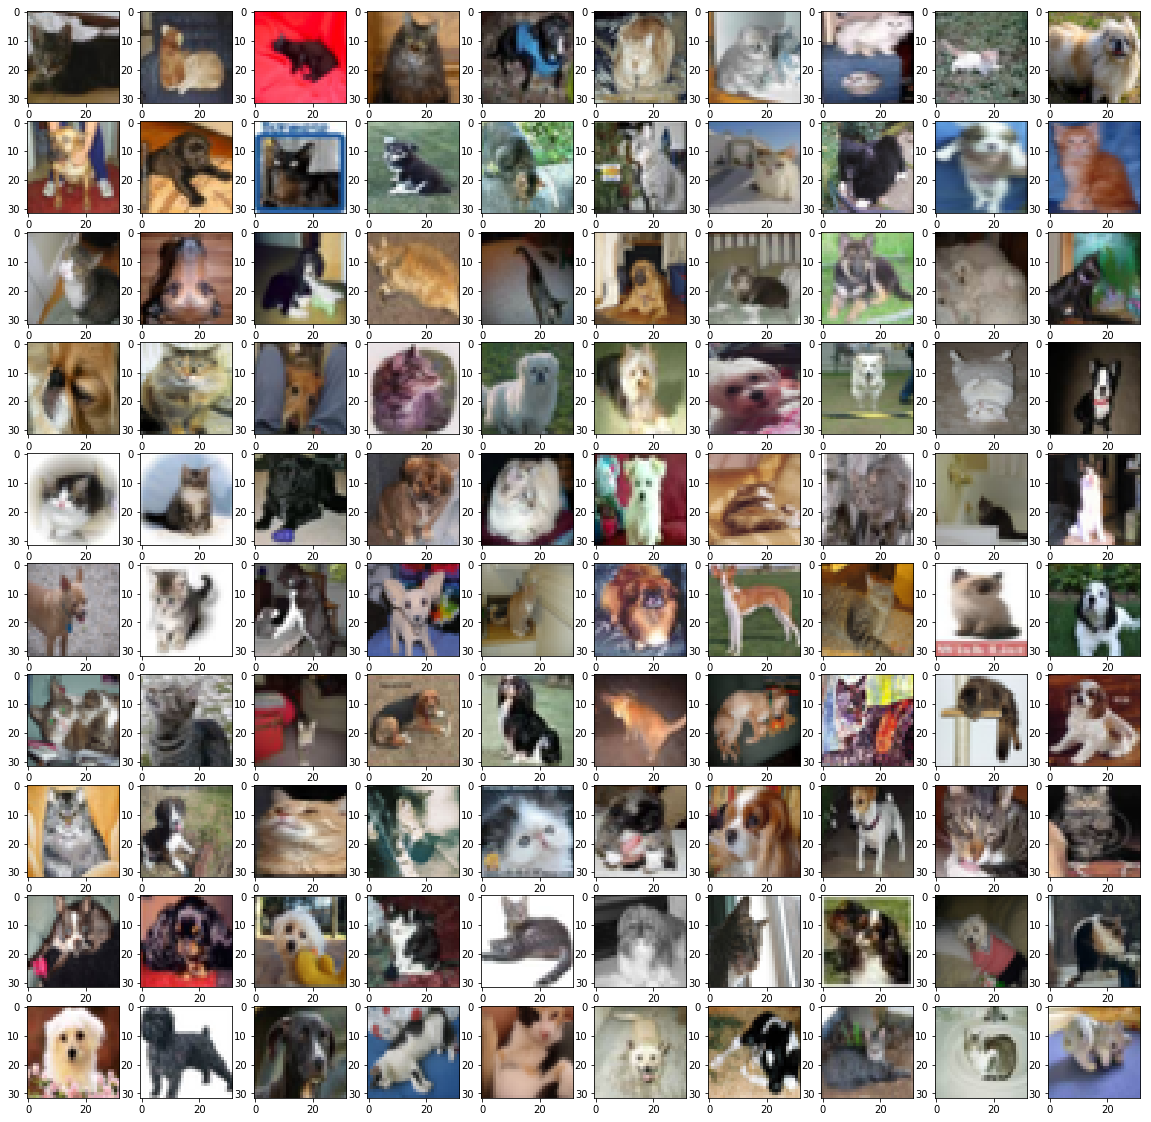

In [10]:
fig = plt.figure(figsize=(20,20))

columns=10
rows=10

img_idx=0

for i in range(1, columns*rows+1):
    
    img = x_train[img_idx]
    
    fig.add_subplot(rows, columns, i)
    
    plt.imshow(img)
    
    img_idx = img_idx + 1

# Teste

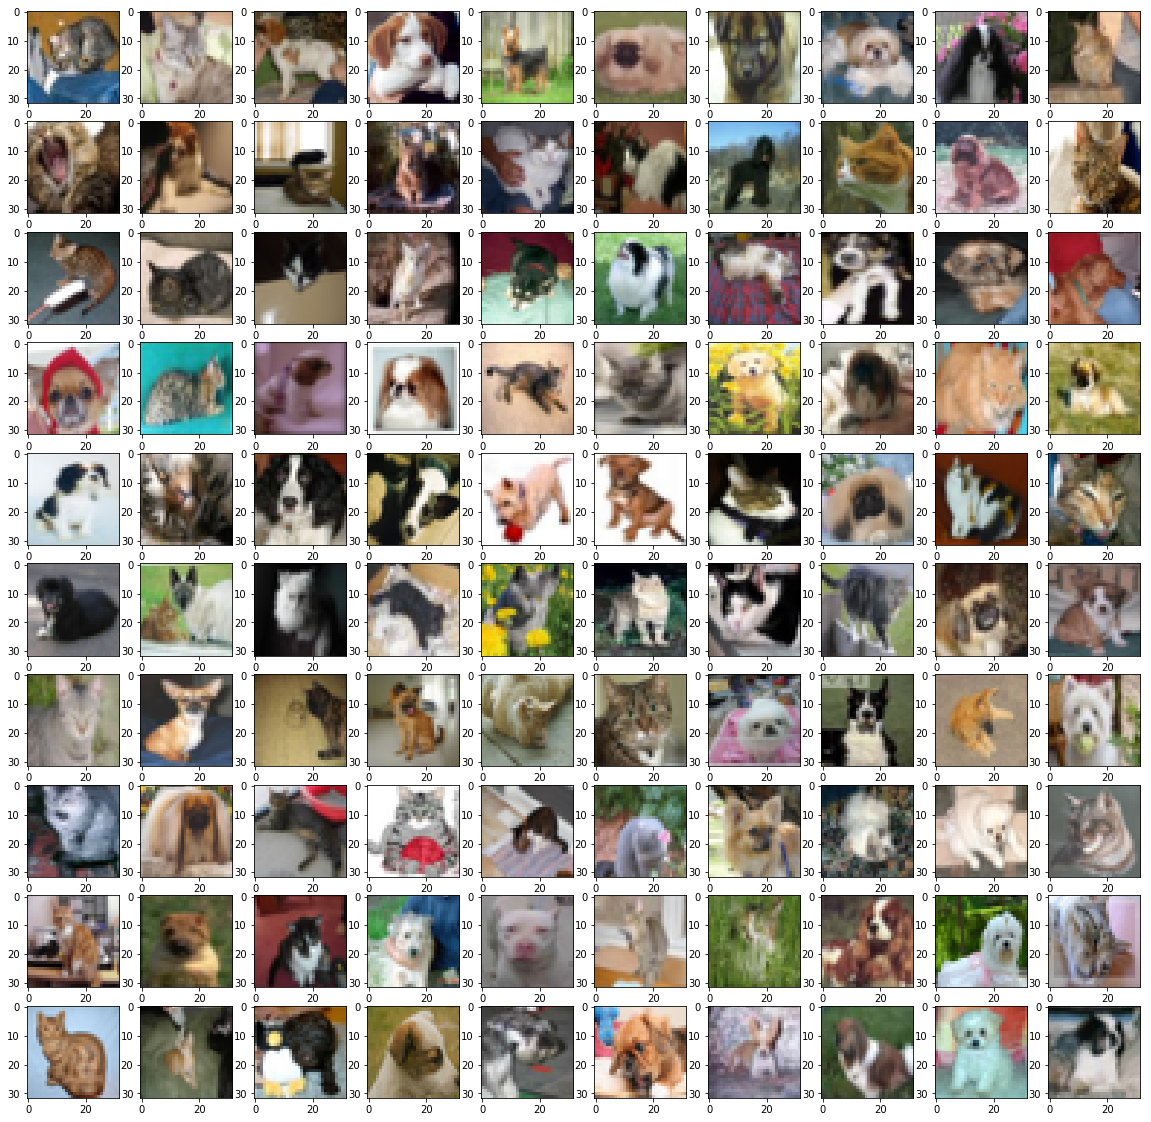

In [11]:
fig = plt.figure(figsize=(20,20))

columns=10
rows=10

img_idx=0

for i in range(1, columns*rows+1):
    
    img = x_test[img_idx]
    
    fig.add_subplot(rows, columns, i)
    
    plt.imshow(img)
    
    img_idx = img_idx + 1

# Pre-processing and Reshaping

vamos transformar ...

cat = 0 e dog = 1

In [12]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [13]:
y_train = np.where(y_train==3, 0, y_train)
y_train = np.where(y_train==5, 1, y_train)

y_test = np.where(y_test==3, 0, y_test)
y_test = np.where(y_test==5, 1, y_test)

In [14]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Arquitetura da Rede Neural Convolucional - LeNet

In [15]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from keras.models import Sequential

Using TensorFlow backend.


In [16]:
input_shape = (x_train.shape[1], x_train.shape[2], x_train.shape[3])

In [17]:
model = Sequential()

model.add(Conv2D(20, kernel_size=(5,5), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(40, kernel_size=(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dropout(0.25))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x_train, y_train, batch_size=50, epochs=30, verbose=1, validation_data=(x_test, y_test))

Train on 10000 samples, validate on 2000 samples
Epoch 1/30
10000/10000 [==============================] - 12s 1ms/step - loss: 0.6694 - acc: 0.5713 - val_loss: 0.6185 - val_acc: 0.6625
Epoch 2/30
10000/10000 [==============================] - 12s 1ms/step - loss: 0.6119 - acc: 0.6649 - val_loss: 0.5831 - val_acc: 0.6865
Epoch 3/30
10000/10000 [==============================] - 16s 2ms/step - loss: 0.5684 - acc: 0.7053 - val_loss: 0.5457 - val_acc: 0.7085
Epoch 4/30
10000/10000 [==============================] - 14s 1ms/step - loss: 0.5384 - acc: 0.7244 - val_loss: 0.5358 - val_acc: 0.7185
Epoch 5/30
10000/10000 [==============================] - 13s 1ms/step - loss: 0.5161 - acc: 0.7438 - val_loss: 0.5421 - val_acc: 0.7280
Epoch 6/30
10000/10000 [==============================] - 13s 1ms/step - loss: 0.4875 - acc: 0.7643 - val_loss: 0.5303 - val_acc: 0.7210
Epoch 7/30
10000/10000 [==============================] - 13s 1ms/step - loss: 0.4537 - acc: 0.7812 - val_loss: 0.5413 - val_acc:

# Avaliando o modelo

In [20]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

('Test accuracy:', 0.7125)


Prob gato: 0.99399614 | Prob cachorro: 0.006003835


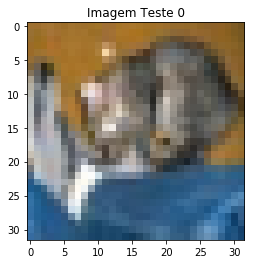

In [21]:
plt.title("Imagem Teste 0")
plt.imshow(x_test[0])

test1 = np.expand_dims(x_test[0], axis=0)

print("Prob gato: " +str(model.predict(test1)[0][0])+" | Prob cachorro: "+str(model.predict(test1)[0][1]))

Prob gato: 0.9998217 | Prob cachorro: 0.00017825788


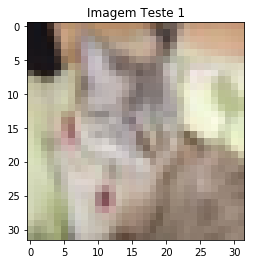

In [22]:
plt.title("Imagem Teste 1")
plt.imshow(x_test[1])

test = np.expand_dims(x_test[1], axis=0)

print("Prob gato: " +str(model.predict(test)[0][0])+" | Prob cachorro: "+str(model.predict(test)[0][1]))

Prob gato: 0.0008351706 | Prob cachorro: 0.9991648


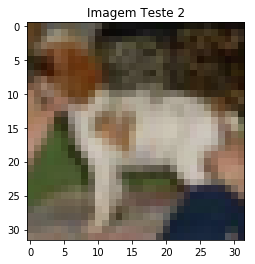

In [23]:
plt.title("Imagem Teste 2")
plt.imshow(x_test[2])

test = np.expand_dims(x_test[2], axis=0)

print("Prob gato: " +str(model.predict(test)[0][0])+" | Prob cachorro: "+str(model.predict(test)[0][1]))

Prob gato: 0.00012850435 | Prob cachorro: 0.9998715


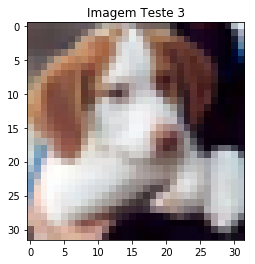

In [24]:
plt.title("Imagem Teste 3")
plt.imshow(x_test[3])

test = np.expand_dims(x_test[3], axis=0)

print("Prob gato: " +str(model.predict(test)[0][0])+" | Prob cachorro: "+str(model.predict(test)[0][1]))